# Text Preprocessosing

In [14]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [2]:
df=pd.read_csv("sample_submission.csv")
df.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [5]:
train_text = train['text']
test_text = test['text']
train_text.head(5)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [6]:
# tokenization and case conversion

tokens = []
for i in range(0, len(train_text)):
    tokens.append(nltk.word_tokenize(train_text[i].strip().lower()))
    
tokens[0]

['our',
 'deeds',
 'are',
 'the',
 'reason',
 'of',
 'this',
 '#',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'all']

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ELCOT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [9]:
# stop words and punctuation removal

stop_words = set(stopwords.words("english"))
punct = string.punctuation

for i in range(len(tokens)):
    x = []
    for token in tokens[i]:
        if token not in punct and token not in stop_words:
            x.append(token.translate(str.maketrans('', '', punct)))
    tokens[i] = x
tokens[0]

['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us']

In [10]:
# stemming using the Porter stemming algorithm and the Lancaster stemming algorithm

porter = PorterStemmer()
lancaster = LancasterStemmer()

tokens_porter = []
tokens_lancaster = []

for i in range(len(tokens)):
    por = []
    lan = []
    for token in tokens[i]:
            por.append(porter.stem(token))
            lan.append(lancaster.stem(token))
    tokens_porter.append(por)
    tokens_lancaster.append(lan)

print(tokens_porter[0])
print(tokens_lancaster[0])

['deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv', 'us']
['dee', 'reason', 'earthquak', 'may', 'allah', 'forg', 'us']


In [11]:
# lemmatization

lemmatizer = WordNetLemmatizer()
tokens_lemmatize = []

for i in range(len(tokens)):
    lem = []
    for token in tokens[i]:
            lem.append(lemmatizer.lemmatize(token))
    tokens_lemmatize.append(lem)

tokens_lemmatize[0]

['deed', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'u']

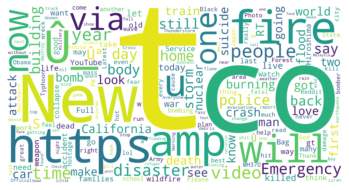

In [12]:
# word cloud generation

train_str = " ".join(text for text in train_text)

word_cloud = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(train_str)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()